In [42]:
import math
import numpy as np
import pandas as pd
import os
import seaborn as sns

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
# change font
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

import warnings
warnings.filterwarnings('ignore')

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## 0. Read Data

Medical Insurance Payout Dataset: https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout

In [3]:
df_input = pd.read_csv(os.path.join(os.getcwd(), '..', 'data', 'expenses.csv'))
df_input.columns = [col.replace('_', ' ') for col in df_input.columns]
df_input

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df_input.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df_input.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df_input.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
df_input.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

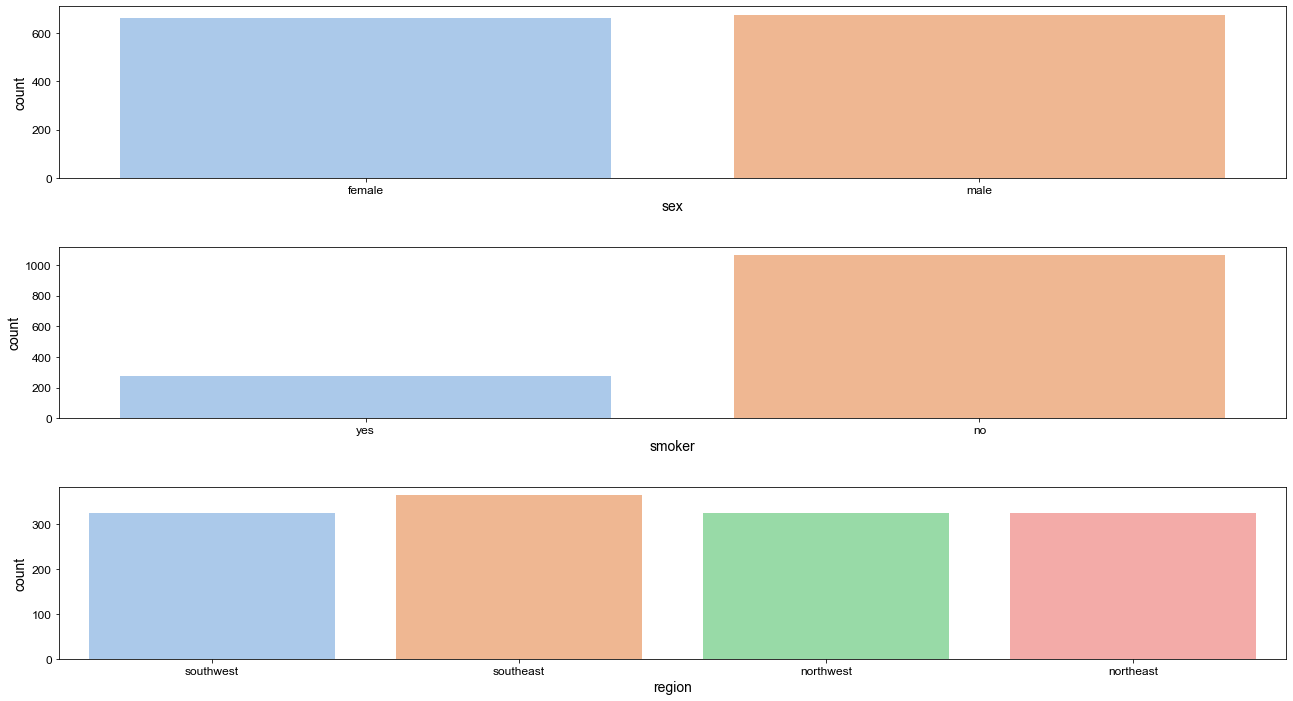

In [8]:
cat_cols = [col for col in df_input.columns if df_input[col].dtype=='O']
cat_cols2 = [col for col in cat_cols if len(df_input[col].unique()) < 25]

fig, axes = plt.subplots(len(cat_cols2), 1, figsize=(22, 4*len(cat_cols2)))
fig.subplots_adjust(hspace=.4, wspace=0)

for ax, col in zip(axes, cat_cols2):
    sns.countplot(x=df_input[col], palette="pastel", ax=ax)

plt.show()

In [9]:
# Binary encode 'sex' and 'smoker' columns
df_input['sex'] = (df_input['sex'] == 'male').astype(int)
df_input.rename(columns={'sex':'male'}, inplace=True)
df_input['smoker'] = (df_input['smoker'] == 'yes').astype(int)

In [10]:
# One-hot encode 'region' column
from sklearn.preprocessing import OneHotEncoder

onehotenc = OneHotEncoder()
onehotenc.fit(df_input[['region']])
df_onehot = pd.DataFrame(onehotenc.transform(df_input[['region']]).toarray(), columns=onehotenc.categories_[0]
                        ).drop('northwest', axis=1).astype(int) # drop 1 column to remove collinearity
df_input = pd.concat([df_input, df_onehot], axis=1).drop(['region'], axis=1)
df_input

,age,male,bmi,children,smoker,charges,northeast,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,0,0,0
4,32,1,28.880,0,0,3866.85520,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [11]:
X = df_input[[col for col in df_input.columns if col not in ['charges']]]
y = df_input['charges']

## 1. EDA

Illustrative EDA example

<Figure size 1728x1728 with 0 Axes>

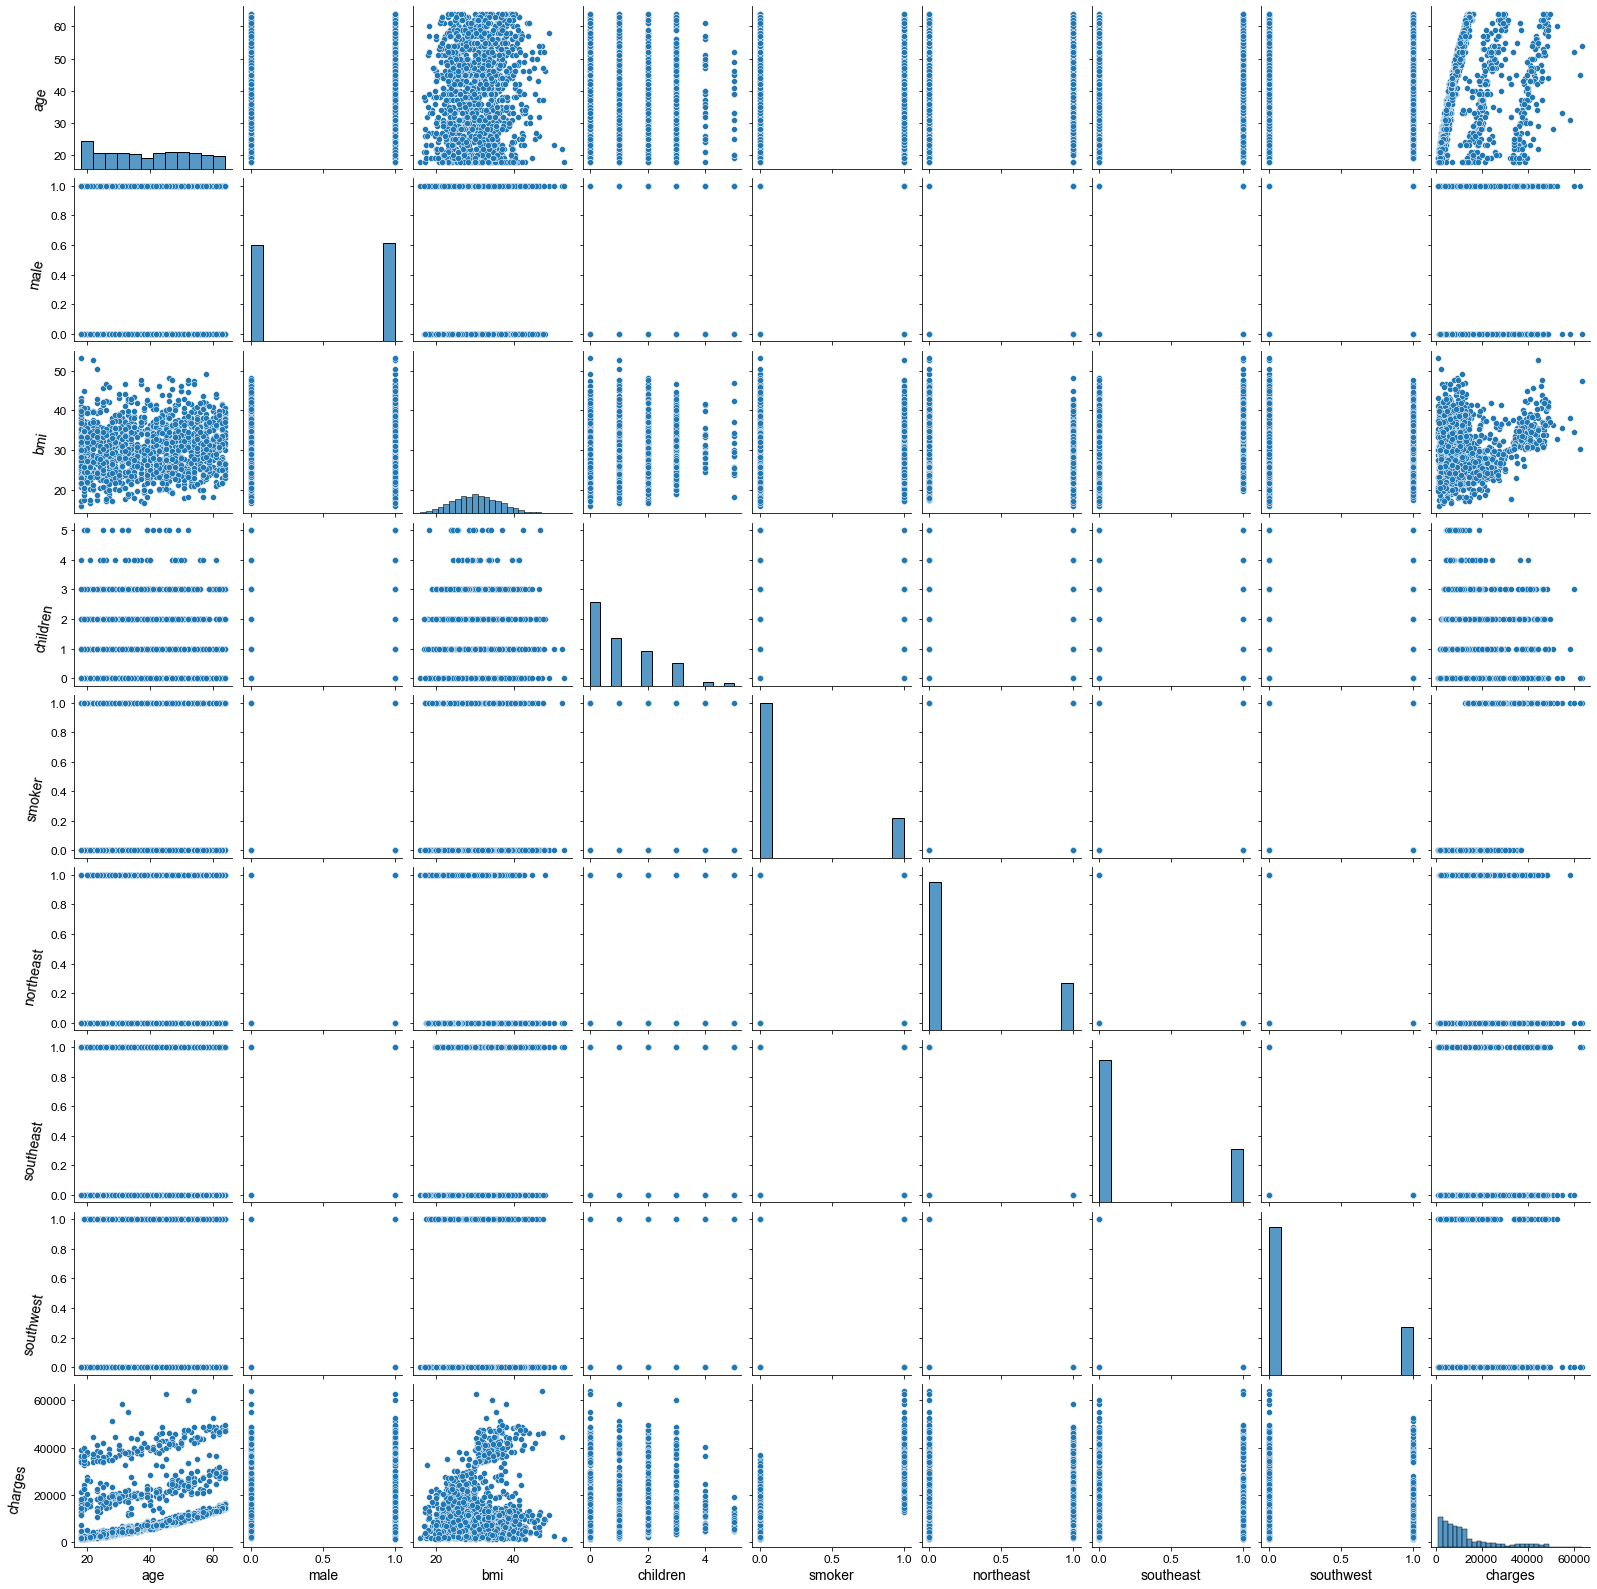

In [12]:
plt.figure(figsize=(24, 24))

# plot_cols = [col for col in X.columns if col not in onehotcols]
plot_cols = X.columns
pairplot = sns.pairplot(pd.concat([X[plot_cols], y], axis=1))
# rotate y labels
for ax in pairplot.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation=0)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation=80)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.show()

## 2. Correlation Analysis

### 2.1. Pearson's Correlation Coefficient

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Compute features' correlation
X_corr = X.corr()

# Generate a mask to onlyshow the bottom triangle
mask_corr = np.triu(np.ones_like(X_corr, dtype=bool))

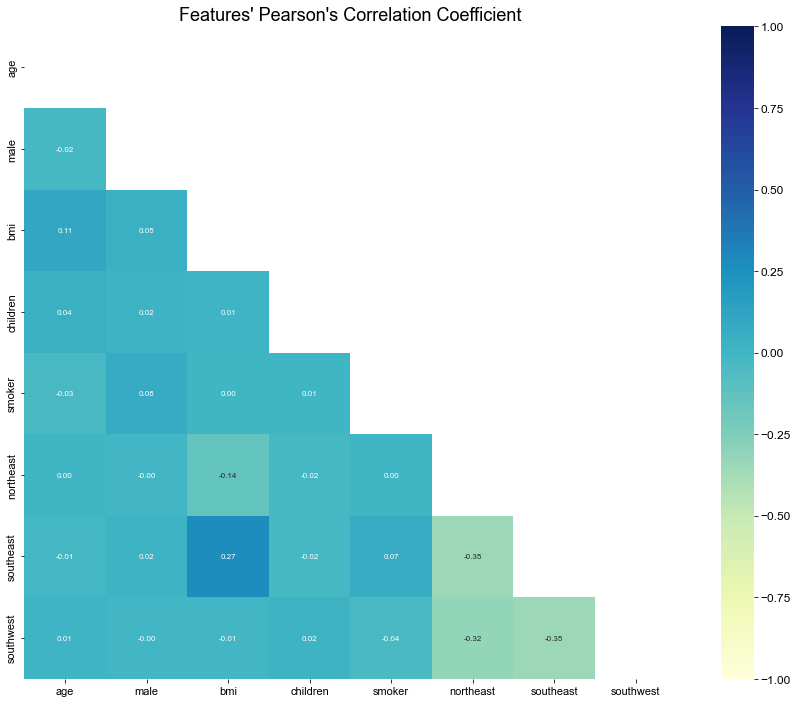

In [15]:
plt.figure(figsize=(16,12))
plt.title("Features' Pearson's Correlation Coefficient", fontsize=18)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# generate heatmap
sns.heatmap(X_corr, cmap='YlGnBu', annot=True, mask=mask_corr, vmin=-1, vmax=1, square=True, annot_kws={'fontsize':8}, fmt='.2f')

plt.show()

Most features do not appear to have strong positive or negative correlations with other features, but there are cases where correlation is high

### 2.2. Multicollinearity

> Multicollinearity is a problem because it undermines the statistical significance of an independent variable. [\[source\]](https://link.springer.com/chapter/10.1007/978-0-585-25657-3_37)

> Multicollinearity does not affect the accuracy of predictive models, including regression models. \[...\] Now, where multicollinearity becomes 'an issue' is when you want to 'interpret' the parameters learned by your model. In other words, you cannot say that the feature with the 'biggest weight' is 'the most important' when the features are correlated. Note that this is independent on the accuracy of the model, this is only the interpretation part [\[source\]](https://www.researchgate.net/post/Are-Random-Forests-affected-by-multi-collinearity-between-features)

> Multicollinearity is only a problem for inference in statistics and analysis. For example, if you’d like to infer the importance of certain features, then almost by definition multicollinearity means that some features are shown as strongly/perfectly correlated with other combination of features, and therefore they are undistinguishable. In this case, you can simply remove the problematic features.
Multicollinearity is not a real problem for prediction. GBT, being more of a black-box model, is more suitable for predictions problems to start with, although of course you could try and use them for inference as well.
[\[source\]](https://www.quora.com/Is-multicollinearity-a-problem-with-gradient-boosted-trees)



#### 2.2.1. Variance Inflation Factor (VIF)

Here’s the formula for calculating the VIF for feature X1: $VIF_{1}=\frac{1}{1-R_{1}^{2}}$

$R^2$ in this formula is the coefficient of determination from the linear regression model which has: X1 as dependent variable (target), and X2, X3, ... as independent variables (features). To calculate VIF for each features, you have to fit a linear regression using such feature as the target.

As a general rule of thumb, "VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem."

- If feature X1 has VIF = 1 (minimum possible value for VIF), then there is zero collinearity between this feature and the other features in the dataset (e.g. X2, X3, ...)
- If feature X1 has VIF = 2.5, then the variance of the regression coefficient of X1 in the original linear regression model is 2.5 times greater than it would have been if X1 had been entirely non-related to other features
- If feature X1 has VIF = Inf, then X1 can be perfectly predicted by using the other features in the dataset
[\[source\]](https://quantifyinghealth.com/vif-threshold/#:~:text=Most%20research%20papers%20consider%20a,of%205%20or%20even%202.5.)

The higher the VIF:
- The more correlated a predictor is with the other predictors
- The more the standard error is inflated
- The larger the confidence interval
- The less likely it is that a coefficient will be evaluated as statistically significant
[\[source\]](https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc)

For implementation example with evaluation on performance and feature importance, read [\[this article\]](https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
df_vif = pd.DataFrame(X.columns, columns=['feature'])
df_vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = df_vif.sort_values('VIF', ascending=False).set_index('feature', drop=True)
df_vif

,VIF
feature,
bmi,11.343556
age,7.700256
southeast,2.267892
male,2.004290
southwest,1.954597
northeast,1.883028
children,1.803692
smoker,1.263915


**Which features would remain if we removed all features with VIF > 10?**

In [18]:
def check_vif(X, threshhold=10):
    features = list(X.columns)
    max_len = max([len(f) for f in features])
    high_vif_cols = []

    for i in range(len(features)):
        vif = [variance_inflation_factor(X[features].values, ix) for ix in range(X[features].shape[1])]
        max_idx = np.argmax(vif)
        if max(vif) > threshhold:
            high_vif_col = features.pop(max_idx)
            high_vif_cols.append(high_vif_col)
            print(f'{i+1}. Removed feature: {(high_vif_col+" ").ljust(max_len+2,".")} VIF: {vif[max_idx]:.2f}')
            
    print(f'\nRemaining features:\n{features}')
    
    df_vif_final = pd.DataFrame(features, columns=['feature'])
    df_vif_final['VIF'] = [variance_inflation_factor(X[features].values, i) for i in range(len(features))]
    df_vif_final = df_vif_final.sort_values('VIF', ascending=False).set_index('feature', drop=True)
    df_vif_final
    
    return high_vif_cols, df_vif_final

In [19]:
high_vif_cols, df_vif_final = check_vif(X)

1. Removed feature: bmi ....... VIF: 11.34

Remaining features:
['age', 'male', 'children', 'smoker', 'northeast', 'southeast', 'southwest']


In [20]:
df_vif_final

,VIF
feature,
age,3.885938
male,1.888118
southeast,1.799117
children,1.745282
southwest,1.711538
northeast,1.702466
smoker,1.255746


__________

#### 2.2.2. Principal Component Analysis (PCA)

Principal Components Analysis (PCA) is a well-known unsupervised dimensionality reduction technique that constructs relevant features/variables through linear (linear PCA) or non-linear (kernel PCA) combinations of the original variables (features).

The construction of relevant features is achieved by linearly transforming correlated variables into a smaller number of uncorrelated variables. This is done by projecting (dot product) the original data into the reduced PCA space using the eigenvectors of the covariance/correlation matrix aka the principal components (PCs).

The resulting projected data are essentially linear combinations of the original data capturing most of the variance in the data.

[\[source\]](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e)

Additional insighful article on multicollinearity and model interpretability: [\[source\]](https://marinawyss.github.io/multicollinearity/)

In [21]:
from sklearn.decomposition import PCA

In [22]:
# Standardize X
stdscaler_initial = StandardScaler()
X_standardized = pd.DataFrame(stdscaler_initial.fit_transform(X), columns=X.columns)

In [23]:
# use all possible PC's
pca_initial = PCA(n_components=X_standardized.shape[1])

pca_cols = [f'PC{i}' for i in range(1,X_standardized.shape[1]+1)]
# The PCA model requires standardized (z-scored) data
X_pca = pd.DataFrame(pca_initial.fit_transform(X_standardized), columns=pca_cols)

In [24]:
df_vif_pca = pd.DataFrame(pca_cols, columns=['PC'])
df_vif_pca['VIF'] = [variance_inflation_factor(X_pca, i) for i in range(X_pca.shape[1])]
df_vif_pca

,PC,VIF
0,PC1,1.0
1,PC2,1.0
2,PC3,1.0
3,PC4,1.0
4,PC5,1.0
5,PC6,1.0
6,PC7,1.0
7,PC8,1.0


In [25]:
df_vif_pca['VIF'].round(decimals=1).value_counts()

1.0    8
Name: VIF, dtype: int64

With PCA, we removed all the multicolinearity in the data

In [26]:
# Compute features' correlation
X_corr_pca = X_pca.corr()

# Generate a mask to onlyshow the bottom triangle
mask_corr_pca = np.triu(np.ones_like(X_corr_pca, dtype=bool))

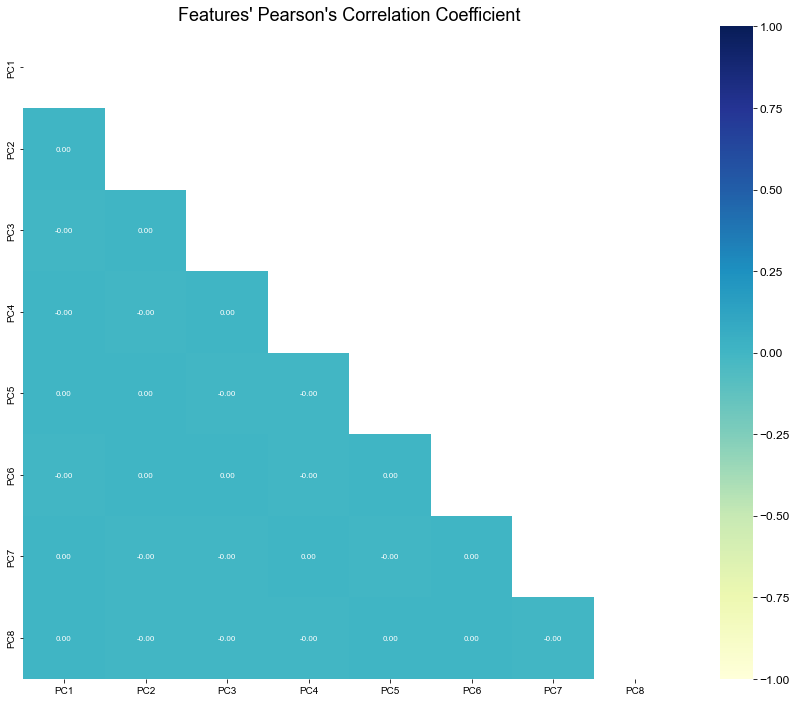

In [27]:
plt.figure(figsize=(16,12))
plt.title("Features' Pearson's Correlation Coefficient", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# generate heatmap
sns.heatmap(X_corr_pca, cmap='YlGnBu', annot=True, mask=mask_corr_pca, vmin=-1, vmax=1, square=True, annot_kws={'fontsize':8}, fmt='.2f')

plt.show()

#### 2.2.3. PCA after train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, df_input.index, test_size=0.2, random_state=0)

In [30]:
# Standardize X_train
stdscaler = StandardScaler()
X_train_std_allcols = pd.DataFrame(stdscaler.fit_transform(X_train), columns=X.columns, index=idx_train)
X_test_std_allcols = pd.DataFrame(stdscaler.transform(X_test), columns=X.columns, index=idx_test)

In [31]:
# A) Select components that explain 90% of the variability in the original data
n_components = np.argmax(pca_initial.explained_variance_ratio_.cumsum() > 0.98) + 1
# B) use all PC's
# n_components = X.shape[1]

# use selected PC's
pca = PCA(n_components=n_components)

pca_cols = [f'PC{i}' for i in range(1,n_components+1)]
# The PCA model requires standardized (z-scored) data
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_std_allcols), columns=pca_cols, index=idx_train)
X_test_pca = pd.DataFrame(pca.transform(X_test_std_allcols), columns=pca_cols, index=idx_test)
X_train_pca_coeffs = pd.DataFrame(pca.components_, index=pca_cols, columns=X.columns)

print(f"Number of Principal Components (PC's) used: {len(pca.explained_variance_ratio_)} (out of {X.shape[1]} possible PC's)")
print(f"Those {len(pca.explained_variance_ratio_)} PC's explain {pca.explained_variance_ratio_.sum()*100:.1f}% of the variance in the original data")

Number of Principal Components (PC's) used: 8 (out of 8 possible PC's)
Those 8 PC's explain 100.0% of the variance in the original data


## Auxiliar Functions' Definitions

In [32]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.model_selection import RepeatedKFold, GridSearchCV

RMSE vs MAE discussion: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

In [33]:
def gridsearch_cv(X_train_, y_train_, model, space, n_splits, n_repeats,
                  scoring=['max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error',
                           'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2'], refit='neg_root_mean_squared_error', random_state=0):
    
    # ignore warnings via env var because GridSearchCV with n_jobs=-1 triggers parallel backend warnings
    os.environ['PYTHONWARNINGS'] = 'ignore'
    # define evaluation
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
    # define search
    search = GridSearchCV(model, space, scoring=scoring, n_jobs=-1, cv=cv, refit=refit, verbose=0)
    # execute search
    result_cv = search.fit(X_train_, y_train_)
    
    return result_cv

In [34]:
def print_metrics_cv(result_cv):
    print('Grid Search CV Best Model - Scoring Metrics:\n')
    print(f"RMSE: {-result_cv.cv_results_['mean_test_neg_root_mean_squared_error'][result_cv.best_index_]:.3f}")
    print(f"MAE:  {-result_cv.cv_results_['mean_test_neg_mean_absolute_error'][result_cv.best_index_]:.3f}")
    print(f"R2:   {result_cv.cv_results_['mean_test_r2'][result_cv.best_index_]:.3f}\n")

    print(f"Mean Squared Err:  {-result_cv.cv_results_['mean_test_neg_mean_squared_error'][result_cv.best_index_]:.3f}")
    print(f"Mean Sq. Log Err:  {-result_cv.cv_results_['mean_test_neg_mean_squared_log_error'][result_cv.best_index_]:.3f}")
    print(f"Median Abs. Err:   {-result_cv.cv_results_['mean_test_neg_median_absolute_error'][result_cv.best_index_]:.3f}")
    print(f"Max Residual Err:  {-result_cv.cv_results_['mean_test_max_error'][result_cv.best_index_]:.3f}\n")

    print(f'\nBest Hyperparameters: {result_cv.best_params_}\n\n')

In [35]:
def print_metrics(y_test_, y_pred_):
    print('Final Model - Scoring Metrics on Test Dataset:\n')
    print(f"RMSE: {mean_squared_error(y_test_, y_pred_, squared=False):.3f}")
    print(f"MAE:  {mean_absolute_error(y_test_, y_pred_):.3f}")
    print(f"R2:   {r2_score(y_test_, y_pred_):.3f}\n")

    print(f"Mean Squared Err:  {mean_squared_error(y_test_, y_pred_, squared=True):.3f}")
    print(f"Mean Sq. Log Err:  {mean_squared_log_error(y_test_, y_pred_):.3f}")
    print(f"Median Abs. Err:   {median_absolute_error(y_test_, y_pred_):.3f}")
    print(f"Max Residual Err:  {max_error(y_test_, y_pred_):.3f}\n")

Function to calculate std error for scikit learn Linear Regression model.

Source: https://stackoverflow.com/a/58357360

In [36]:
# https://stackoverflow.com/questions/22381497/python-scikit-learn-linear-model-parameter-standard-error

def linreg_stderror(model, X_, y_):

    N = X_.shape[0]
    p = X_.shape[1] + 1 # plus one because LinearRegression adds an intercept term

    X_with_intercept = np.empty(shape=(N, p), dtype=float)
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = X_.values
    
    y_hat = model.predict(X_)
    residuals = y_.values - y_hat
    residual_sum_of_squares = residuals.T @ residuals
    sigma_squared_hat = residual_sum_of_squares / (N - p)
    var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
    
    stderrs = []
    for p_ in range(p):
        stderrs.append(math.sqrt(var_beta_hat[p_, p_]))
    
    return stderrs[0], stderrs[1:] # stderr intercept, stderrs coeffs

In [55]:
import matplotlib.patches as mpatches

def get_order_of_magnitude(number):
    return math.floor(math.log(number, 10))

def plot_importance(df_importance, intercept, intercept_stderr, model_description):

    idx_order = df_importance.index
    df_importance['Absolute Coefficients'] = df_importance['Coefficients'].abs()
    df_importance = df_importance.sort_values('Absolute Coefficients', ascending=True)

    colors_dict = {
        'Positive': 'royalblue',
        'Negative': 'firebrick'
    }
    df_importance['Color'] = df_importance.apply(
        lambda row: colors_dict['Negative'] if row['Coefficients'] < 0 else colors_dict['Positive'], axis=1
    )
    
    fig, ax = plt.subplots()
    
    max_coeff = df_importance['Absolute Coefficients'].max()
    big_cis = []
    cis = df_importance['Standard Error'].copy() * 1.96 # x1.96 to get 95% CI
    for idx, ci in cis.iteritems():
        if get_order_of_magnitude(ci) > get_order_of_magnitude(max_coeff):
            big_cis.append((idx, ci))
            cis.loc[idx] = 0 # remover CIs grandes para que a barra de erro fique dentro da escala visivel
    
    fill_value = 1.75 * np.average([max_coeff, cis.max()]) # valor arbitrario para usar no lugar dos CIs muito grandes
    for idx_err, big_ci in big_cis:
        cis.loc[idx_err] = fill_value # preencher CIs grandes com o maior CI da mesma ordem de grandez (valor arbitrario) 
            
    df_importance['Absolute Coefficients'].plot(
        kind="barh", color=df_importance['Color'], figsize=(10, max(df_importance.shape[0]/2, 7)), legend=False, ax=ax, 
        xerr=cis.reindex(df_importance.index), ecolor='black', error_kw={'label':'95% confidence interval', 'capsize':4, 'capthick':1}
    )
    
    for idx_err, big_ci in big_cis:
        display_string = f". . . .\n(95% CI = ±{big_ci:,.2f})"
        ax.text(df_importance['Absolute Coefficients'].loc[idx_err] + 1.14*fill_value, df_importance['Standard Error'].index.get_loc(idx_err)+0.275,
                display_string, color='black', fontweight='bold', ha='right', va='top', linespacing=1.5)
    
    ax.xaxis.grid()
    ax.set_axisbelow(True)
    plt.suptitle(model_description + ' - Coefficient Values with 95% CI (±1.96 Std Error)', fontsize=BIGGER_SIZE)
    plt.title(f'Y axis intercept: {intercept:.3f} ± {1.96*intercept_stderr:.3f} (95% CI)', pad=15, fontsize=MEDIUM_SIZE)
    legend_patches = [
        ax.get_legend_handles_labels()[0][0], # confidence interval
        mpatches.Patch(color=colors_dict['Positive'], label='Positive Coefficient'),
        mpatches.Patch(color=colors_dict['Negative'], label='Negative Coefficient'),
    ]
    plt.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.125),
                  ncol=3, fancybox=True, shadow=False)
    
    plt.show()
    
    return df_importance[['Coefficients', 'Absolute Coefficients', 'Standard Error']].reindex(idx_order)

In [38]:
def check_pca_transform(X_test_std_allcols, y_pred_pca, df_importance_pca, intercept):
    y_pred_pca_reversed = X_test_std_allcols.dot(df_importance_pca['Coefficients']) + intercept
    if (np.round(y_pred_pca, decimals=3) == np.round(y_pred_pca_reversed, decimals=3)
       ).astype(int).sum() == X_test_std_allcols.shape[0]:
        print('SUCCESS: PCA coefficients reverse transformation was performed correctly!')
    else:
        print('FAIL: PCA coefficients reverse transformation was NOT performed correctly!')

In [ ]:
def plot_eval_metrics_xgb(eval_results, eval_metrics):
    n_epochs = len(eval_results['validation_0'][list(eval_metrics.keys())[0]])

    fig, axes = plt.subplots(nrows=1, ncols=len(eval_metrics.keys()), figsize=(7*len(eval_metrics.keys()),5))
    for ax, (metric_code, metric) in zip(axes, eval_metrics.items()):
        ax.plot(range(n_epochs), eval_results['validation_0'][metric_code], label='Train')
        ax.plot(range(n_epochs), eval_results['validation_1'][metric_code], label='Test')
        ax.set_title(metric, fontsize=MEDIUM_SIZE)
        ax.set_xlabel('Iterations')
        ax.legend()
    plt.suptitle('Evaluation Metrics during Model Training', y=1.05)
    plt.show()

In [ ]:
def plot_shap_importance(shap_values, X_test_, classes_dict, model_classes, title='Feature Importance'):
    with sns.axes_style("whitegrid"):
        plt.title(title, fontsize=BIGGER_SIZE)
        shap.summary_plot(shap_values, X_test_, plot_type="bar", class_names=[classes_dict[i] for i in model_classes],
                      max_display=X_test_.shape[1], plot_size=(12,X_test_.shape[1]/2.5))
    plt.show()

In [ ]:
def plot_gain_metric_xgb(df_importance_gain, title):
    df_importance_gain.sort_values('Feature Gain', ascending=True).plot(kind="barh", figsize=(12, df_importance_gain.shape[0]/2.5), legend=False)
    plt.gca().xaxis.grid(True)
    plt.gca().set_axisbelow(True)
    plt.title(title, pad=20, fontsize=BIGGER_SIZE)
    plt.show()

## 3. Linear Regression

In [39]:
from sklearn.linear_model import ElasticNet # Linear regression with combined L1 (Lasso) and L2 (Ridge) priors as regularizer

In [40]:
space_linreg = {
    'alpha': np.logspace(-5, 2, num=15, base=10.0), # 10e-5 to 100 in 15 steps
    'l1_ratio': np.linspace(0,1,9), # 0%, 12.5%, 25%, ... 100%
    'fit_intercept': [True],
    'max_iter': [5000], # use 5000 instead of defalult 1000
    'tol': np.logspace(-6, -4, num=3, base=10.0), # default is 1e-4 = 10e-5
    'selection': ['cyclic', 'random'],
}

### 3.1. Linear Regression on PC's

In [41]:
%%time
# Hyperparameter tuning with Grid Search Cross Validation

result_cv_linreg_pca = gridsearch_cv(X_train_pca, y_train, model=ElasticNet(), space=space_linreg,
                                     n_splits=4, n_repeats=2, refit='neg_root_mean_squared_error', random_state=0)
result_cv_linreg_pca

CPU times: user 912 ms, sys: 109 ms, total: 1.02 s
Wall time: 7.41 s


/Users/pedro/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
   

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=4, random_state=0),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e...
                         'l1_ratio': array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                         'max_iter': [5000], 'selection': ['cyclic', 'random'],
                         'tol': array([1.e-06, 1.e-05, 1.e-04])},
             refit='neg_root_mean_squared_error',
             scoring=['max_error', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_root_mean_squared_error',
                      'neg_mean_squared_log_error', 'neg_median_absolute_error',
                      'r2'])

In [43]:
print_metrics_cv(result_cv_linreg_pca)

Grid Search CV Best Model - Scoring Metrics:

RMSE: 6331.148
MAE:  4504.283
R2:   0.719

Mean Squared Err:  40286658.818
Mean Sq. Log Err:  0.296
Median Abs. Err:   2931.639
Max Residual Err:  27685.515


Best Hyperparameters: {'alpha': 0.31622776601683794, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 5000, 'selection': 'random', 'tol': 1e-06}




In [44]:
# define best model
model_linreg_pca = ElasticNet(
    **result_cv_linreg_pca.best_params_, random_state=0
)

In [46]:
# Fit model and make predictions
model_linreg_pca.fit(X_train_pca, y_train)
y_pred_pca = model_linreg_pca.predict(X_test_pca)
y_pred_pca_train = model_linreg_pca.predict(X_train_pca)

print(f"RMSE - Training set: {mean_squared_error(y_train, y_pred_pca_train, squared=False):.3f} | Test set: {mean_squared_error(y_test, y_pred_pca, squared=False):.3f}")
print(f"MAE  - Training set: {mean_absolute_error(y_train, y_pred_pca_train):.3f} | Test set: {mean_absolute_error(y_test, y_pred_pca):.3f}")
print(f"R2   - Training set: {r2_score(y_train, y_pred_pca_train):.3f} | Test set: {r2_score(y_test, y_pred_pca):.3f}")

RMSE - Training set: 6306.896 | Test set: 5977.471
MAE  - Training set: 4481.502 | Test set: 4310.597
R2   - Training set: 0.723 | Test set: 0.775


In [47]:
print_metrics(y_test, y_pred_pca)

Final Model - Scoring Metrics on Test Dataset:

RMSE: 5977.471
MAE:  4310.597
R2:   0.775

Mean Squared Err:  35730165.118
Mean Sq. Log Err:  0.258
Median Abs. Err:   2711.811
Max Residual Err:  23003.571



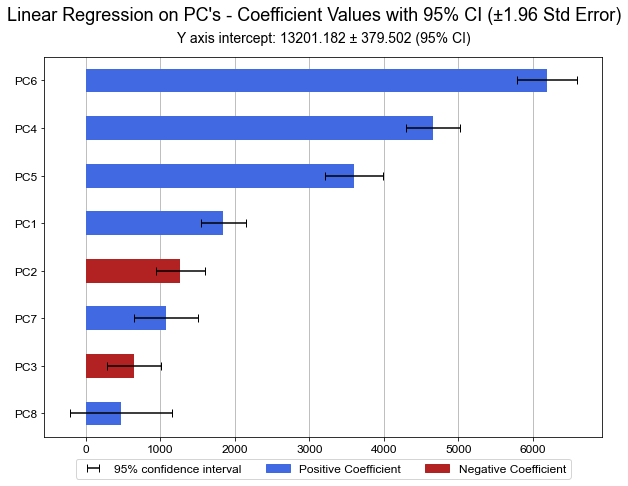

In [56]:
df_importance_components_pca = pd.DataFrame(np.transpose(model_linreg_pca.coef_), columns=['Coefficients'], index=pca_cols)
intercept_stderr_pca, df_importance_components_pca['Standard Error'] = linreg_stderror(model_linreg_pca, X_train_pca, y_train)
df_importance_components_pca = plot_importance(df_importance_components_pca, model_linreg_pca.intercept_, intercept_stderr_pca,
                                              model_description="Linear Regression on PC's")

CI for the coefficients of the original features is the square root of the sum of the squares of the radius of the CI for the coefficients of the principal components.

Sources:
- Stack Exchange: https://stats.stackexchange.com/a/224760
- Uncertainties and Error Propagation: https://www.geol.lsu.edu/jlorenzo/geophysics/uncertainties/Uncertaintiespart2.html
- Error Propagation (Propagation of Uncertainty): https://www.statisticshowto.com/statistics-basics/error-propagation/

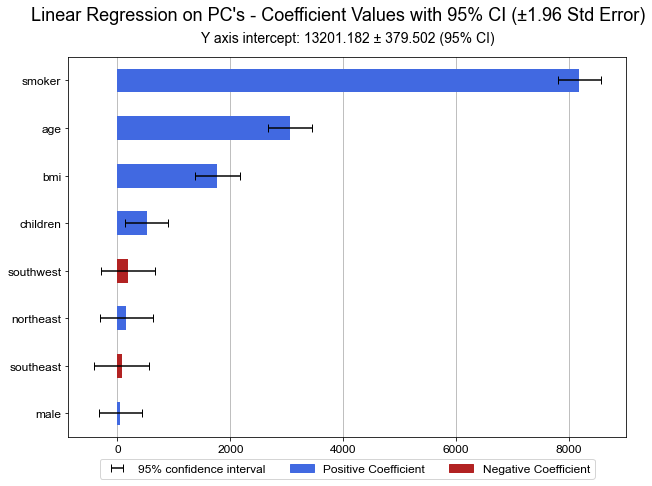

In [57]:
df_importance_pca = X_train_pca_coeffs.multiply(
                        df_importance_components_pca['Coefficients'], axis='index'
                    ).sum(axis=0).to_frame(name='Coefficients')

# Source: https://stats.stackexchange.com/questions/223924/how-to-add-up-partial-confidence-intervals-to-create-a-total-confidence-interval
df_importance_pca['Standard Error'] = np.sqrt((X_train_pca_coeffs.multiply(df_importance_components_pca['Standard Error'], axis='index')**2).sum(axis=0))

df_importance_pca = plot_importance(df_importance_pca, model_linreg_pca.intercept_, intercept_stderr_pca,
                                    model_description="Linear Regression on PC's")

In [58]:
# Check if PCA reverse tranformation was done correctly
check_pca_transform(X_test_std_allcols, y_pred_pca, df_importance_pca, model_linreg_pca.intercept_)

SUCCESS: PCA coefficients reverse transformation was performed correctly!


### 3.2. Linear Regression on original dataset

In [59]:
# High-VIF columns
high_vif_cols

['bmi']

In [60]:
# define columns to remove
cols_to_remove = high_vif_cols

# X_train_std = X_train_std_allcols[[col for col in X_train_std_allcols.columns if col not in cols_to_remove]]
# X_test_std = X_test_std_allcols[[col for col in X_test_std_allcols.columns if col not in cols_to_remove]]

X_train_std = X_train_std_allcols.copy()
X_test_std = X_test_std_allcols.copy()

In [61]:
%%time
# Hyperparameter tuning with Grid Search Cross Validation

result_cv_linreg = gridsearch_cv(X_train_std, y_train, model=ElasticNet(), space=space_linreg,
                                 n_splits=4, n_repeats=2, refit='neg_root_mean_squared_error', random_state=0)
result_cv_linreg

CPU times: user 998 ms, sys: 122 ms, total: 1.12 s
Wall time: 17 s


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=4, random_state=0),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e...
                         'l1_ratio': array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                         'max_iter': [5000], 'selection': ['cyclic', 'random'],
                         'tol': array([1.e-06, 1.e-05, 1.e-04])},
             refit='neg_root_mean_squared_error',
             scoring=['max_error', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_root_mean_squared_error',
                      'neg_mean_squared_log_error', 'neg_median_absolute_error',
                      'r2'])

In [62]:
print_metrics_cv(result_cv_linreg)

Grid Search CV Best Model - Scoring Metrics:

RMSE: 6331.112
MAE:  4504.243
R2:   0.719

Mean Squared Err:  40286205.506
Mean Sq. Log Err:  0.296
Median Abs. Err:   2931.467
Max Residual Err:  27685.056


Best Hyperparameters: {'alpha': 0.31622776601683794, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 5000, 'selection': 'random', 'tol': 1e-05}




In [63]:
# define best model
model_linreg = ElasticNet(
    **result_cv_linreg.best_params_, random_state=0
)

In [64]:
# Fit model and make predictions
model_linreg.fit(X_train_std, y_train)
y_pred = model_linreg.predict(X_test_std)
y_pred_train = model_linreg.predict(X_train_std)

print(f"RMSE - Training set: {mean_squared_error(y_train, y_pred_train, squared=False):.3f} | Test set: {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"MAE  - Training set: {mean_absolute_error(y_train, y_pred_train):.3f} | Test set: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"R2   - Training set: {r2_score(y_train, y_pred_train):.3f} | Test set: {r2_score(y_test, y_pred):.3f}")

RMSE - Training set: 6306.864 | Test set: 5977.429
MAE  - Training set: 4481.497 | Test set: 4310.554
R2   - Training set: 0.723 | Test set: 0.775


In [65]:
print_metrics(y_test, y_pred)

Final Model - Scoring Metrics on Test Dataset:

RMSE: 5977.429
MAE:  4310.554
R2:   0.775

Mean Squared Err:  35729655.991
Mean Sq. Log Err:  0.258
Median Abs. Err:   2711.728
Max Residual Err:  23003.144



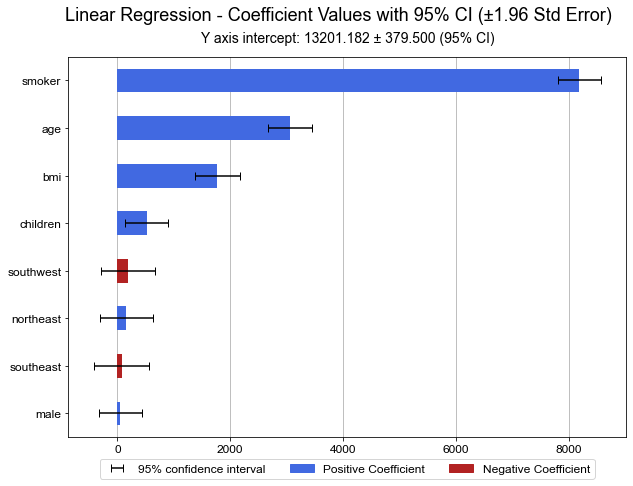

In [66]:
df_importance = pd.DataFrame(np.transpose(model_linreg.coef_), columns=['Coefficients'], index=X_train_std.columns)
intercept_stderr, df_importance['Standard Error'] = linreg_stderror(model_linreg, X_train_std, y_train)
df_importance = plot_importance(df_importance, model_linreg.intercept_, intercept_stderr,
                                              model_description="Linear Regression")

## 4. XGBoost Classifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import shap

In [ ]:
y_train.value_counts()

In [ ]:
# Calculate negative class odds (ratio of # of negative class samples to # of positive class samples) to correct for class imbalance
# neg_class_odds = (sum(negative instances) / sum(positive instances))

neg_class_odds = y_train[y_train == 0].count() / y_train[y_train == 1].count()
neg_class_odds

XGBoost parameter explanation: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

In [ ]:
space_xgb = {
    'objective': ['binary:logistic', 'binary:hinge'],
    'n_estimators': [40, 50, 60],
    'learning_rate': [0.1],
    'max_depth': [4, 5, 6],
    'min_child_weight': [2, 3, 5],
    'gamma': [0, 0.5],
    'alpha':[0, 0.3],
    'scale_pos_weight': [neg_class_odds],
    'lambda':[1, 1.25],
    ## 'subsample': [0.8, 1.0],
    ## 'colsample_bytree': [0.8, 1.0],
    'verbosity': [0], # 0 to ignore warnings
}

In [ ]:
eval_metrics = {
    'logloss': 'Binary Cross-entropy Loss (aka Logistic Log-loss)',
    'error': 'Binary Classification Error Rate',
    'auc': 'ROC AUC'
}

### 4.1. XGBoost on PC's

In [ ]:
%%time
# Hyperparameter tuning with Grid Search Cross Validation

result_cv_xgb_pca = gridsearch_cv(X_train_pca, y_train, model=XGBClassifier(), 
                                 space=space_xgb, n_splits=4, n_repeats=1, refit='f1', random_state=0)
result_cv_xgb_pca

In [ ]:
print_metrics_cv(result_cv_xgb_pca)

In [ ]:
# define best model
model_xgb_pca = XGBClassifier(
    **result_cv_xgb_pca.best_params_, random_state=0
)

In [ ]:
# Fit model and make predictions
model_xgb_pca.fit(X_train_pca, y_train, eval_set=[(X_train_pca, y_train), (X_test_pca, y_test)], eval_metric=list(eval_metrics.keys()), verbose=False)
y_pred_pca = model_xgb_pca.predict(X_test_pca)
y_pred_proba_pca = model_xgb_pca.predict_proba(X_test_pca)
print(f'Accuracy on Training Set: {100*model_xgb_pca.score(X_train_pca, y_train):.1f}%')
print(f'Accuracy on Test Set:     {100*model_xgb_pca.score(X_test_pca, y_test):.1f}%')

In [ ]:
print_metrics(y_test, y_pred_pca)

In [ ]:
plot_eval_metrics_xgb(model_xgb_pca.evals_result(), eval_metrics)

In [ ]:
# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
plot_confusion_matrix(cm_pca, target_names=[classes_dict[i] for i in model_xgb_pca.classes_])

**SHAP Analysis**

In [ ]:
explainer = shap.TreeExplainer(model_xgb_pca)
shap_values_pca = explainer.shap_values(X_test_pca)

In [ ]:
plot_shap_importance(shap_values_pca, X_test_pca, classes_dict, model_xgb_pca.classes_)

In [ ]:
shap.summary_plot(np.array(shap_values_pca), X_test_pca, feature_names=pca_cols, show=True, max_display=None, plot_size=(12,7))

In [ ]:
df_shap_pca = pd.DataFrame(shap_values_pca, columns=X_test_pca.columns)
df_importance_shap_pca = df_shap_pca.T.abs().mean(axis=1).to_frame(name='mean(|SHAP|)')

# df_importance_pca.sort_values('mean(|SHAP|)', ascending=False)

In [ ]:
shap_values = np.dot(shap_values_pca, X_train_pca_coeffs.values)

In [ ]:
df_shap = pd.DataFrame(shap_values, columns=X.columns)
df_importance_shap = df_shap.T.abs().mean(axis=1).to_frame(name='Feature Importance - derived from mean(|SHAP|)')

# df_importance_shap.sort_values('Feature Importance - derived from mean(|SHAP|)', ascending=False)

In [ ]:
plot_shap_importance(shap_values, X_test_std_allcols, classes_dict, model_xgb_pca.classes_)

In [ ]:
shap.summary_plot(np.array(shap_values), X_test_std_allcols, feature_names=X_test_std_allcols.columns, show=True, max_display=None, plot_size=(12,8))

**Feature Importance from XGBoost 'gain' metric**

In [ ]:
df_importance_gain_pca = pd.DataFrame(model_xgb_pca.feature_importances_, index=pca_cols, columns=['PC Feature Gain'])
df_importance_gain = X_train_pca_coeffs.multiply(df_importance_gain_pca['PC Feature Gain'], axis='index').sum(axis=0).abs().to_frame(name='Feature Gain')

plot_gain_metric_xgb(df_importance_gain, title="XGBoost - Original Feature's Importance\n(derived from XGBoost 'gain' importance metric for the PC's)")

### 4.2. XGBoost on original dataset

In [ ]:
# High-VIF columns
high_vif_cols

In [ ]:
# define columns to remove
cols_to_remove = high_vif_cols

X_train_std = X_train_std_allcols[[col for col in X_train_std_allcols.columns if col not in cols_to_remove]]
X_test_std = X_test_std_allcols[[col for col in X_test_std_allcols.columns if col not in cols_to_remove]]

In [ ]:
%%time
# Hyperparameter tuning with Grid Search Cross Validation

result_cv_xgb = gridsearch_cv(X_train_std, y_train, model=XGBClassifier(), 
                                 space=space_xgb, n_splits=4, n_repeats=1, refit='f1', random_state=0)
result_cv_xgb

In [ ]:
print_metrics_cv(result_cv_xgb)

In [ ]:
# define best model
model_xgb = XGBClassifier(
    **result_cv_xgb.best_params_, random_state=0
)

In [ ]:
# Fit model and make predictions
model_xgb.fit(X_train_std, y_train, eval_set=[(X_train_std, y_train), (X_test_std, y_test)], eval_metric=list(eval_metrics.keys()), verbose=False)
y_pred = model_xgb.predict(X_test_std)
y_pred_proba = model_xgb.predict_proba(X_test_std)
print(f'Accuracy on Training Set: {100*model_xgb.score(X_train_std, y_train):.1f}%')
print(f'Accuracy on Test Set:     {100*model_xgb.score(X_test_std, y_test):.1f}%')

In [ ]:
print_metrics(y_test, y_pred)

In [ ]:
plot_eval_metrics_xgb(model_xgb.evals_result(), eval_metrics)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, target_names=[classes_dict[i] for i in model_xgb.classes_])

**SHAP Analysis**

In [ ]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test_std)

In [ ]:
plot_shap_importance(shap_values, X_test_std, classes_dict, model_xgb.classes_)

In [ ]:
df_shap = pd.DataFrame(shap_values, columns=X_test_std.columns)
df_importance_shap = df_shap.T.abs().mean(axis=1).to_frame(name='mean(|SHAP|)')

# df_importance_shap.sort_values('mean(|SHAP|)', ascending=False)

In [ ]:
shap.summary_plot(np.array(shap_values), X_test_std, feature_names=X_test_std_allcols.columns, show=True, max_display=None, plot_size=(12,8))

**Feature Importance from XGBoost 'gain' metric**

In [ ]:
df_importance_gain = pd.DataFrame(model_xgb.feature_importances_, index=X_test_std.columns, columns=['Feature Gain'])

plot_gain_metric_xgb(df_importance_gain, title="XGBoost - Feature Importance\n(XGBoost 'gain' importance metric)")